In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline #tensorflow

UsageError: unrecognized arguments: #tensorflow


In [2]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
train_image.shape,train_label.shape#(数量，长，宽)

((60000, 28, 28), (60000,))

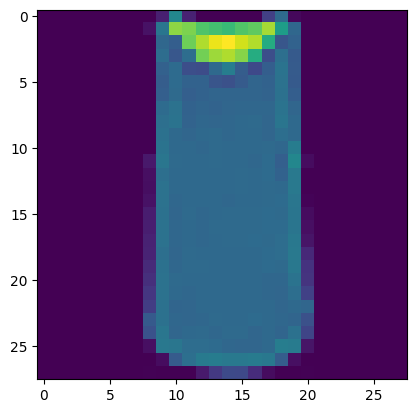

In [4]:
plt.imshow(train_image[2])#展示图片代码

In [5]:
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
train_label[0]#查看分类

9

In [7]:
model = tf.keras.Sequential()

In [8]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))#扁平化图像，转化为向量处理
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))#将结果转化为概率分布

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']#测量判断正确率
)

In [10]:
history = model.fit(train_image,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 875us/step - loss: 3.9003 - acc: 0.6946
Epoch 2/10
1875/1875 [==============================] - 2s 867us/step - loss: 0.7293 - acc: 0.7387
Epoch 3/10
1875/1875 [==============================] - 2s 852us/step - loss: 0.6200 - acc: 0.7756
Epoch 4/10
1875/1875 [==============================] - 2s 860us/step - loss: 0.5699 - acc: 0.7955
Epoch 5/10
1875/1875 [==============================] - 2s 871us/step - loss: 0.5224 - acc: 0.8162
Epoch 6/10
1875/1875 [==============================] - 2s 884us/step - loss: 0.5022 - acc: 0.8250
Epoch 7/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.4973 - acc: 0.8292
Epoch 8/10
1875/1875 [==============================] - 2s 893us/step - loss: 0.4759 - acc: 0.8359
Epoch 9/10
1875/1875 [==============================] - 2s 873us/step - loss: 0.4763 - acc: 0.8375
Epoch 10/10
1875/1875 [==============================] - 2s 860us/step - loss: 0.4710 - acc: 0.8395


In [11]:
history.history.keys()

dict_keys(['loss', 'acc'])

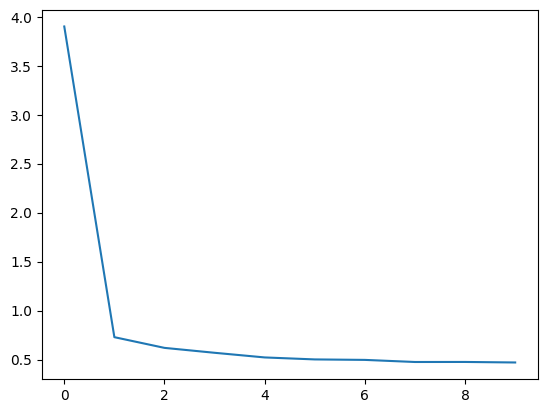

In [12]:
plt.plot(history.epoch,history.history.get('loss'))

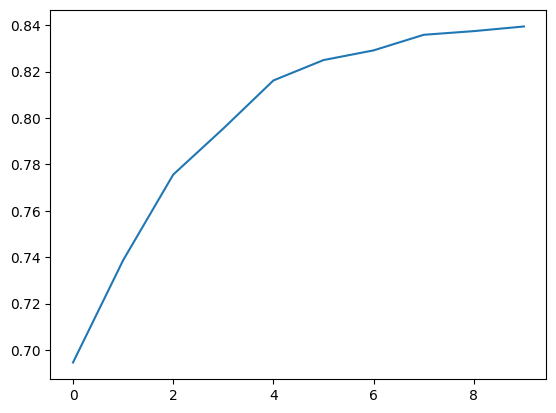

In [13]:
plt.plot(history.epoch,history.history.get('acc'))

In [14]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 0s 693us/step - loss: 0.5792 - acc: 0.8315


[0.5792481899261475, 0.8314999938011169]

In [15]:
train_label#独热编码onehot，当符合单一要求时，表示的数组中只有一个为1，其余为0

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [37]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))#扁平化图像，转化为向量处理
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))#将结果转化为概率分布

In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc']
             )

In [30]:
history = model.fit(train_image,train_label_onehot,
                    epochs=5,
                    validation_data=(test_image,test_label_onehot))#训练的同时显示在test数据集中的训练结果

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3685 - acc: 0.8670 - val_loss: 0.3915 - val_acc: 0.8630
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3481 - acc: 0.8735 - val_loss: 0.4085 - val_acc: 0.8555
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3411 - acc: 0.8765 - val_loss: 0.3922 - val_acc: 0.8606
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3295 - acc: 0.8814 - val_loss: 0.4302 - val_acc: 0.8443
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3277 - acc: 0.8810 - val_loss: 0.4209 - val_acc: 0.8623


<function matplotlib.pyplot.legend(*args, **kwargs)>

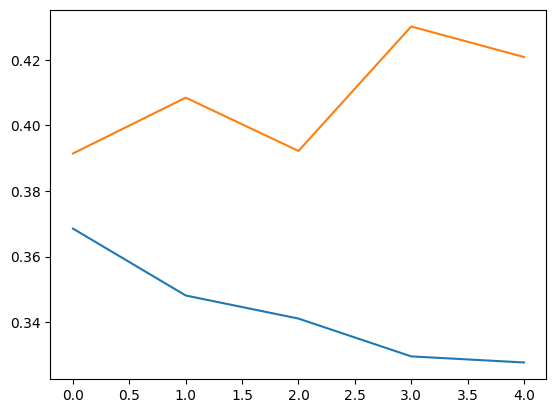

In [35]:
plt.plot(history.epoch,history.history.get('loss') ,label='loss')
plt.plot(history.epoch,history.history.get('val_loss') ,label='val_loss')
plt.legend

In [36]:
#已经出现过拟合现象。在测试数据中表现较差，在训练数据中表现非常好